In [1]:
from load_data import load_data

path='/Users/hbeltz/Documents/runs/'
LastOrbit_=False
OLR_=False

verbose=False

runname,lon_arr,lat_arr,oom,surfp,p_BAR,data_26,data_lo,data_olr=load_data(path,LastOrbit_,OLR_,verbose)


Run Name?:brun2
Pressure OOM?:7
Surface Press [bar]:100
  
 ....reading fort.26
       nlat= 48 nlon= 96 nlev= 45
       END OF FILE: DONE


# ----------------------------------
#  Temperature Contour Plots 

-------------------------------------------------------
  Plotting Atmosphere Level:  24 -> Pressure= 0.0647
-------------------------------------------------------
66.31578947368419


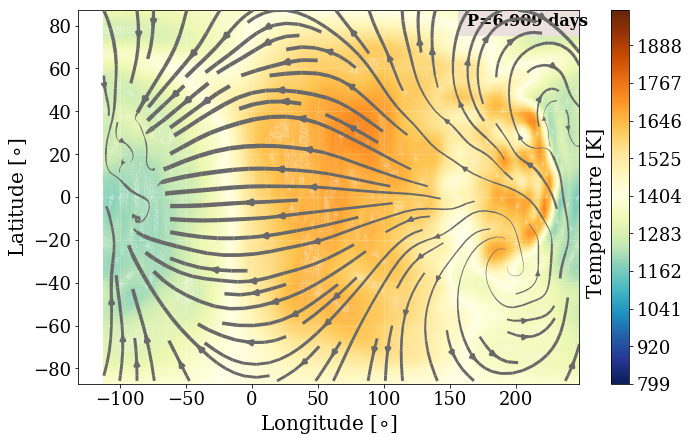

In [2]:
from igcm_func import igcm_Plot

lev=24

plot=3              #0=temp, 1=U wind, 2=V wind, 3=streamplot, 4=OLR

vfrac=1.0           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=0           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

ortho=False 
caption=True   #set equal to true to have a caption
cap='P=6.909 days'  #caption in top right#orthographic projection
latcenter=0.0       #center of plot in degrees
loncenter=68

freeze=False         #adds a black line at water freezing temperature,useful for earth

savefig=True
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'
if plot==3:
    ptype='STREAM'
if plot==4:
    ptype='OLR'

if ortho==True:
    pstyle='_ortho'
else:
    pstyle=''

if plot<4:
    savename=path+runname+'/'+ptype+str(int(lev))+runname+pstyle+'.png'
else:
    savename=path+runname+'/'+ptype+pstyle+'.pdf'


ver=True           #verbose output, PLOTS AND TEXT

cbarL=800 #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=2000 #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature

cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

%matplotlib inline
igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,caption,cap,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)
# ###########################
# plot=1
# ptype='UWIND'
# #cbarL=-33.0
# #cbarM=33.0
# savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

# igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
#           savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)
# ###########################
# plot=2
# ptype='VWIND'
# #cbarL=-33.0
# #cbarM=33.0
# savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

# igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
#           savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)
# ###########################
# plot=3
# ptype='STREAM'
# #cbarL=245.0
# #cbarM=305.0
# if ortho==True:
#     savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.png'
# else:
#     savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

# igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
#           savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False)


# -------------------------------------
# Longitudinally Averaged Plots #

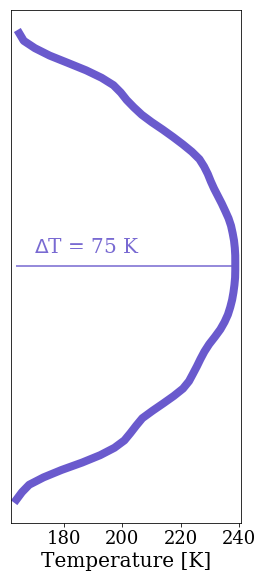

In [7]:
from igcm_func import lon_avg

savepath='Files/'+runname
lev=4
plot=0              #0=temp, 1=U wind, 2=V wind,
lo=True            #last orbit average
ln=0.2  #left point of line labels (in 0-1)
tn=0.93 #top point of line labels (in 0-1)

noy=True  #don't plot y labels

%matplotlib inline

test=lon_avg(plot,savepath,data_lo,lon_arr,lat_arr,lev,lo,ln,tn,noy)


********** Maximum of 4 RUNS currently **********
*************************************************
Run Name?:NEPTUNE
Pressure OOM?:5
Surface Press [bar]:30
*************************************************
Enter another run name?? (y or n)y
Run Name?:NEPTUNE_05tdiss
Pressure OOM?:5
Surface Press [bar]:30
*************************************************
Enter another run name?? (y or n)y
Run Name?:NEPTUNE_2tdiss
Pressure OOM?:5
Surface Press [bar]:30
*************************************************
Enter another run name?? (y or n)y
Run Name?:NEPTUNE_10tdiss
Pressure OOM?:5
Surface Press [bar]:30
*************************************************


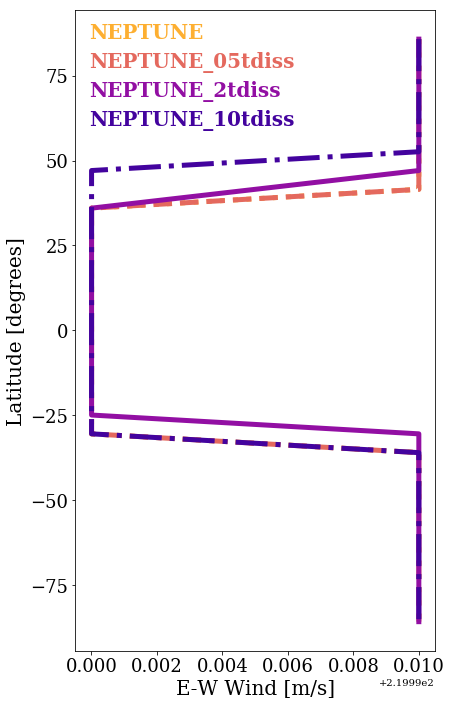

In [4]:
from lon_avg import lon_avg_comp

path='Files/'
lev=29
plot=0              #0=temp, 1=U wind, 2=V wind,
lo=False            #last orbit average
ln=0.2  #left point of line labels (in 0-1)
tn=0.93 #top point of line labels (in 0-1)

%matplotlib inline
test=lon_avg_comp(path,plot,lev,lo,ln,tn)


In [4]:
## Maybe you want a movie showing the last orbit....
import numpy as np
import imageio
import os
from igcm_Plot import igcm_Plot


lev=29

plot=0              #0=temp, 1=U wind, 2=V wind, 3=streamplot

vfrac=2.0           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=2           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=2           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

ortho=False         #orthographic projection
latcenter=0.0       #center of plot in degrees, ONLY WORKS FOR ORTHO=True
loncenter=0.0 

freeze=True         #adds a black line at water freezing temperature, useful for earth

savefig=True
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'
if plot==3:
    ptype='STREAM'

if ortho==True:
    pstyle='_ortho'
else:
    pstyle=''
    
savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

ver=False           #verbose output, PLOTS AND TEXT

cbarL=np.nanmin(data_lo[lev,:,:,0,:]) #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=np.nanmax(data_lo[lev,:,:,0,:]) #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature
cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

savepath=path+runname+'/LastOrb_F/'

nouts=data_lo.shape[-1]
for t in range(0,nouts):
    lo=True  #holder for last orbit
    savename=savepath+str.zfill(str(int(t)),4)+'.png'
    igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_lo[:,:,:,:,t],lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,lo)
    
file_names = sorted((fn for fn in os.listdir(savepath)if fn.endswith('.png')))
images=[]
for filename in file_names:
    images.append(imageio.imread(savepath+filename))
imageio.mimsave(savepath+'lastorb.gif',images,duration=0.35)

-------------------------------------------------------
Min UWind [m/s], Plot limit:  -5288.39990234375 -5585.0
Max UWind [m/s], Plot limit:  5585.0 5585.0
-------------------------------------------------------
(45, 48)


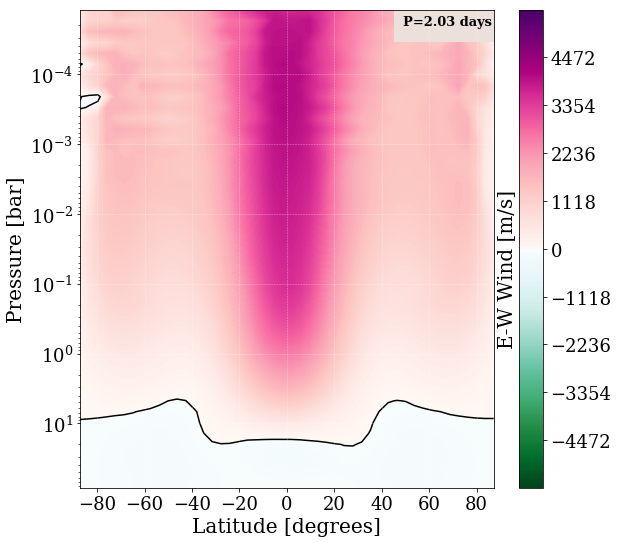

In [27]:
from press_Plot import press_Plot

plot=1              #0 to plot temps, 1 to plot E-W winds, 2=N-S winds. (USUALLY ONLY T AND E-W USED) 

longavg=True       #if True, longavg
long_pl=0.0         #if longavg=True, ignored, otherwise longitude to plot at

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=0           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

caption=True   #set equal to true to have a caption
cap='P=2.03 days'  #caption in top right
freeze=False         #adds a black line at water freezing temperature,useful for earth only works for plot=0

zeros=True #draw a contour line at 0
freeze=False         #adds a black line at water freezing temperature,useful for earth only works for plot=0


ver=True           #verbose output, PLOTS AND TEXT

cbarL=0.0 #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=0.0 #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature

cbar_even=True      #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

lo=False            #if True, average of last orbit is used

savefig=True

##########################################################
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'


savename=path+runname+'/Pressure_'+ptype+'.png'
##########################################################


%matplotlib inline
press_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,units_a,units_t,units_w,freeze, caption, cap,
          savefig,savename,zeros,ver,cbarL,cbarM,cbar_even,ex,ncolors,longavg,long_pl,lo,oom)
